In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ["age", "workclass", "final_weight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [7]:
df_training = pd.read_csv("..\\data\\adult_training.csv", names=column_names)

In [197]:
df_training.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [198]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [199]:
df_training.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [200]:
df_training.shape

(32561, 15)

In [201]:
df_training.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [202]:
df_training.duplicated().sum()  # We'll deal with duplicates some time later

24

In [203]:
df_training["income"].unique() 

array([' <=50K', ' >50K'], dtype=object)

In [204]:
df_training["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [205]:
df_training["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [206]:
df_training["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [207]:
df_training["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [208]:
def remove_spaces(df, column_list: list):
    for i in column_list:
        df[i] = df[i].str.strip()

In [209]:
col_list = ["income", "workclass", "sex", "race", "occupation"]

In [210]:
# All the columns in col_list have a space before their actual meaningful values, so we strip them.

remove_spaces(df_training, col_list)

In [211]:
# Filling missing values

df_training["workclass"].replace("?", "No workclass found!", inplace=True)
df_training["occupation"].replace("?", "No occupation found!", inplace=True)

In [225]:
# Encoding categorical data

def label_encoding(df, column_list):
    encoder = LabelEncoder()
    for i in column_list:
        df[i] = encoder.fit_transform(df[i])
        print(f"Classes of the column '{i}' and its new encoded values are:")
        print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
        print()

In [213]:
label_encoding(df_training, col_list)

Classes of the column 'income' and its new encoded values are:
{'<=50K': 0, '>50K': 1}

Classes of the column 'workclass' and its new encoded values are:
{'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'No workclass found!': 3, 'Private': 4, 'Self-emp-inc': 5, 'Self-emp-not-inc': 6, 'State-gov': 7, 'Without-pay': 8}

Classes of the column 'sex' and its new encoded values are:
{'Female': 0, 'Male': 1}

Classes of the column 'race' and its new encoded values are:
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}

Classes of the column 'occupation' and its new encoded values are:
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'No occupation found!': 7, 'Other-service': 8, 'Priv-house-serv': 9, 'Prof-specialty': 10, 'Protective-serv': 11, 'Sales': 12, 'Tech-support': 13, 'Transport-moving': 14}



In [214]:
df_training.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,Bachelors,13,Never-married,0,Not-in-family,4,1,2174,0,40,United-States,0
1,50,6,83311,Bachelors,13,Married-civ-spouse,3,Husband,4,1,0,0,13,United-States,0
2,38,4,215646,HS-grad,9,Divorced,5,Not-in-family,4,1,0,0,40,United-States,0
3,53,4,234721,11th,7,Married-civ-spouse,5,Husband,2,1,0,0,40,United-States,0
4,28,4,338409,Bachelors,13,Married-civ-spouse,10,Wife,2,0,0,0,40,Cuba,0


In [215]:
# Calculating correlation values so that choosing relevant features becomes easier.

correlation_matrix = df_training.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  

correlation_matrix, mask

# We create a matrix which has the shape of the correlation matrix, but filled with ones (using np.ones_like()).
# Then, we take the matrix's upper trianglular values using np.triu() which takes the diagonal values and values above the diagonal.

(                     age  workclass  final_weight  education_num  occupation  \
 age             1.000000   0.008677     -0.076646       0.036527   -0.006222   
 workclass       0.008677   1.000000     -0.018089      -0.009009   -0.000628   
 final_weight   -0.076646  -0.018089      1.000000      -0.043195    0.000071   
 education_num   0.036527  -0.009009     -0.043195       1.000000    0.091466   
 occupation     -0.006222  -0.000628      0.000071       0.091466    1.000000   
 race            0.028718   0.053466     -0.021291       0.031838   -0.004154   
 sex             0.088832   0.076795      0.026858       0.012280    0.043347   
 capital_gain    0.077674   0.030571      0.000432       0.122630    0.021139   
 capital_loss    0.057775   0.000938     -0.010252       0.079923    0.011749   
 hours_per_week  0.068756   0.059909     -0.018768       0.148123    0.004330   
 income          0.234037   0.002212     -0.009463       0.335154    0.045396   
 
                     race 

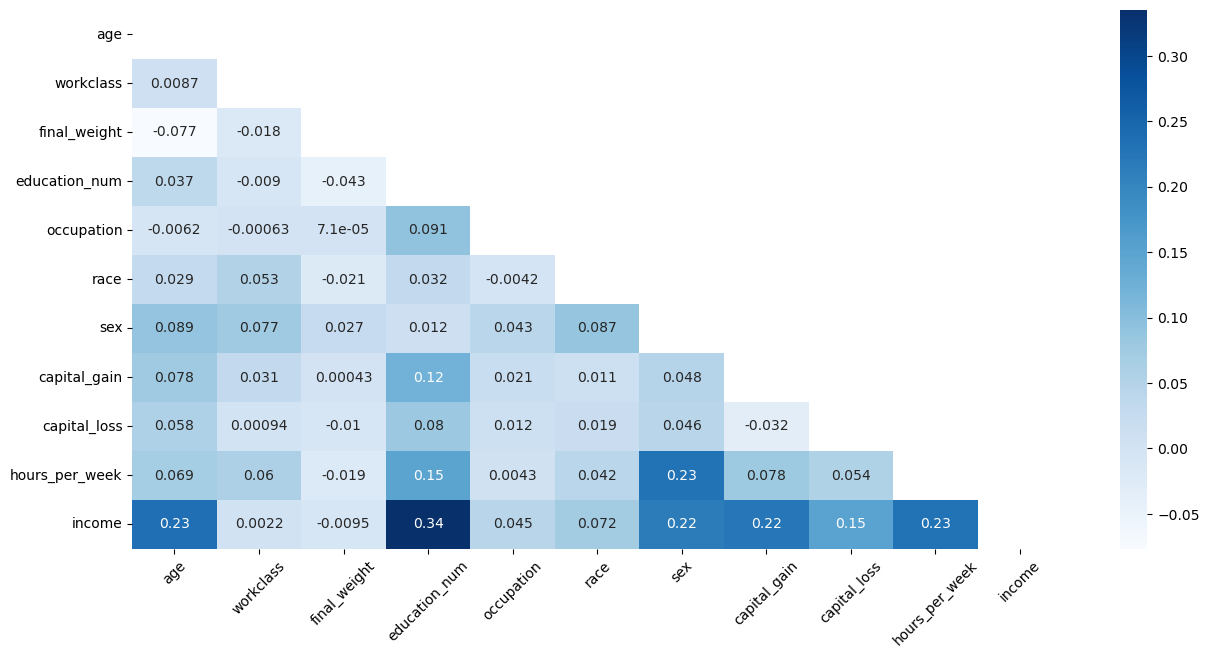

In [216]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_training.corr(numeric_only=True), annot=True, mask=mask, cmap="Blues")  # The mask only takes values corresponding to True from the correlation matrix.
plt.xticks(rotation=45)
plt.show()

### Our Initial Inferences

* #### From the heatmap above, we can conclude that the target field, i.e., the 'income' column is comparatively strongly related to columns: "age", "education_num", "capital_gain", "capital_loss" and "hours_per_week". 



* #### On the basis of intuition, we thought that "sex" should also be correlated to income because in some companies, females are paid lesser than males; and this heatmap concludes that inference.



* #### Also, as an experiment, we questioned whether income would be related to race or not. Surprisingly, it does! Race has slightly related more to income than other irrelevant columns such as workclass and final_weight. After label encoding the race column, we have values ranging from 0 to 4. The correlation matrix states there's a very weak positive correlation between race and income; which means: As the value of "race" increases (for e.g., take the value 4 instead of 3), the income increases (the value "White" is set to 4 and some might say white people are paid more here but that topic is subjective). 

In [8]:
df_test = pd.read_csv("..\\data\\adult_test.csv", names=column_names)
df_test.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [218]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   final_weight    16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [219]:
df_test.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [220]:
df_test.shape

(16281, 15)

In [221]:
df_test.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [222]:
df_test.duplicated().sum()

5

In [223]:
# All the columns in col_list have a space before their actual meaningful values in the test data too, so we strip them here as well.

remove_spaces(df_test, col_list)

In [224]:
# Filling missing values

df_test["workclass"].replace("?", "No workclass found!", inplace=True)
df_test["occupation"].replace("?", "No occupation found!", inplace=True)

In [226]:
# Encoding categorical data in the test dataset

label_encoding(df_test, col_list)

Classes of the column 'income' and its new encoded values are:
{'<=50K.': 0, '>50K.': 1}

Classes of the column 'workclass' and its new encoded values are:
{'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'No workclass found!': 3, 'Private': 4, 'Self-emp-inc': 5, 'Self-emp-not-inc': 6, 'State-gov': 7, 'Without-pay': 8}

Classes of the column 'sex' and its new encoded values are:
{'Female': 0, 'Male': 1}

Classes of the column 'race' and its new encoded values are:
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}

Classes of the column 'occupation' and its new encoded values are:
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'No occupation found!': 7, 'Other-service': 8, 'Priv-house-serv': 9, 'Prof-specialty': 10, 'Protective-serv': 11, 'Sales': 12, 'Tech-support': 13, 'Transport-moving': 14}

